### Combining datasets
The data is split into different files by year and model. Let's see if we can combine the datasets into a single object for easier processing.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path

# path to data is /beegfs/CMIP6/arctic-cmip6/Arctic_Rivers_Data/
data_dir = Path("/beegfs/CMIP6/arctic-cmip6/Arctic_Rivers_Data/")

Get all streamflow datasets for a particular model and concatenate them along the time dimension.

In [13]:
hC2LE7_fps = list(data_dir.glob('*hC2LE7_Q*.nc'))
hC2LE7_fps.sort()
hC2LE7_fps

[PosixPath('/beegfs/CMIP6/arctic-cmip6/Arctic_Rivers_Data/1990_hC2LE7_Q.nc'),
 PosixPath('/beegfs/CMIP6/arctic-cmip6/Arctic_Rivers_Data/1991_hC2LE7_Q.nc'),
 PosixPath('/beegfs/CMIP6/arctic-cmip6/Arctic_Rivers_Data/1992_hC2LE7_Q.nc'),
 PosixPath('/beegfs/CMIP6/arctic-cmip6/Arctic_Rivers_Data/1993_hC2LE7_Q.nc'),
 PosixPath('/beegfs/CMIP6/arctic-cmip6/Arctic_Rivers_Data/1994_hC2LE7_Q.nc'),
 PosixPath('/beegfs/CMIP6/arctic-cmip6/Arctic_Rivers_Data/1995_hC2LE7_Q.nc'),
 PosixPath('/beegfs/CMIP6/arctic-cmip6/Arctic_Rivers_Data/1996_hC2LE7_Q.nc'),
 PosixPath('/beegfs/CMIP6/arctic-cmip6/Arctic_Rivers_Data/1997_hC2LE7_Q.nc'),
 PosixPath('/beegfs/CMIP6/arctic-cmip6/Arctic_Rivers_Data/1998_hC2LE7_Q.nc'),
 PosixPath('/beegfs/CMIP6/arctic-cmip6/Arctic_Rivers_Data/1999_hC2LE7_Q.nc'),
 PosixPath('/beegfs/CMIP6/arctic-cmip6/Arctic_Rivers_Data/2000_hC2LE7_Q.nc'),
 PosixPath('/beegfs/CMIP6/arctic-cmip6/Arctic_Rivers_Data/2001_hC2LE7_Q.nc'),
 PosixPath('/beegfs/CMIP6/arctic-cmip6/Arctic_Rivers_Data/2002_h

In [14]:
hC2LE7 = xr.open_mfdataset(hC2LE7_fps, combine='nested', concat_dim='time', parallel=True)
hC2LE7

<xarray.Dataset> Size: 2GB
Dimensions:          (time: 11589, seg: 34346)
Coordinates:
  * seg              (seg) int64 275kB 81000004 81000005 ... 82001706 82001714
  * time             (time) datetime64[ns] 93kB 1990-01-01T12:00:00 ... 2021-...
Data variables:
    IRFroutedRunoff  (time, seg) float32 2GB dask.array<chunksize=(1, 34346), meta=np.ndarray>
Attributes:
    version:  v1.2.1

Plot it to see if the values are sane.

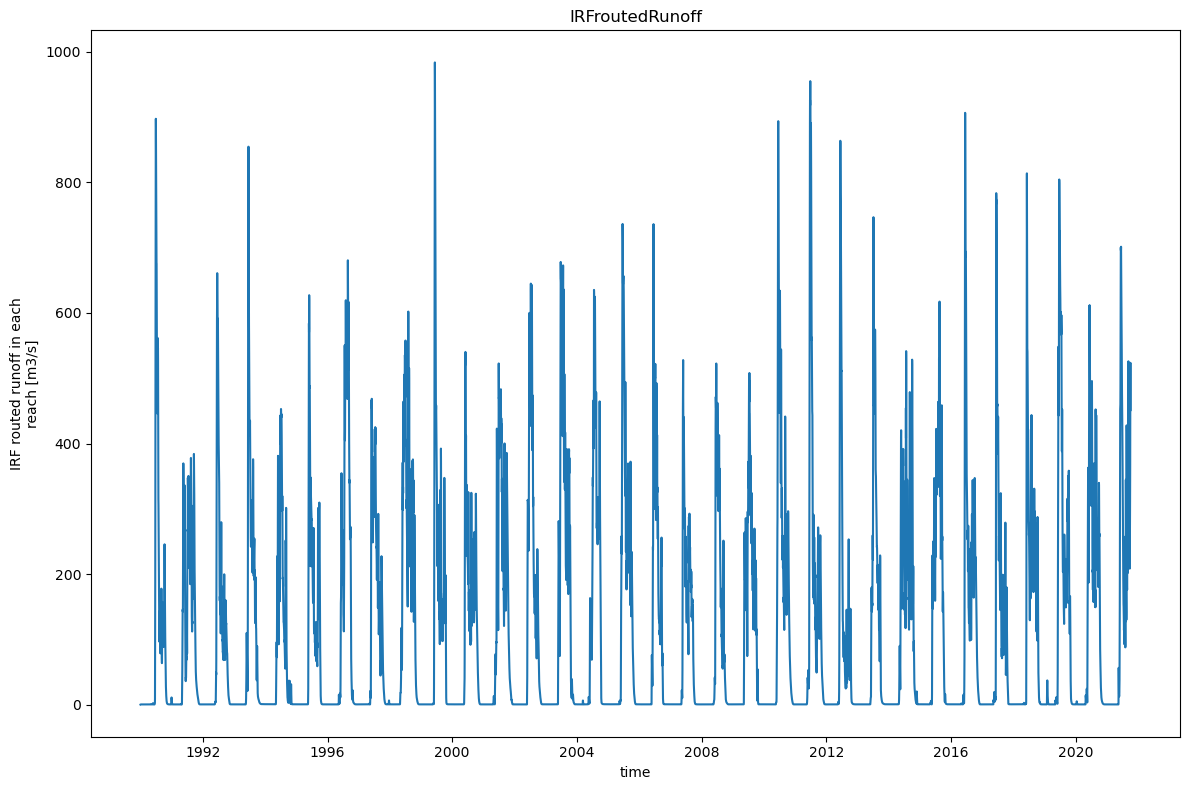

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8), sharex=True)

var = 'IRFroutedRunoff'
ds[var].sel(seg=81000076).plot(ax=ax)
ax.set_title(var)

plt.tight_layout()
plt.show()

Now let's try to combine two models together along a new dimension `model`.

In [16]:
hC2LE9_fps = list(data_dir.glob('*hC2LE9_Q*.nc'))
hC2LE9_fps.sort()
hC2LE9 = xr.open_mfdataset(hC2LE9_fps, combine='nested', concat_dim='time', parallel=True)
hC2LE9

<xarray.Dataset> Size: 2GB
Dimensions:          (time: 11589, seg: 34346)
Coordinates:
  * seg              (seg) int64 275kB 81000004 81000005 ... 82001706 82001714
  * time             (time) datetime64[ns] 93kB 1990-01-01T12:00:00 ... 2021-...
Data variables:
    IRFroutedRunoff  (time, seg) float32 2GB dask.array<chunksize=(1, 34346), meta=np.ndarray>
Attributes:
    version:  v1.2.1

In [20]:
ds = xr.concat([hC2LE7, hC2LE9], pd.Index(['hC2LE7', 'hC2LE9'], name='model'))

In [21]:
ds

<xarray.Dataset> Size: 3GB
Dimensions:          (model: 2, time: 11589, seg: 34346)
Coordinates:
  * seg              (seg) int64 275kB 81000004 81000005 ... 82001706 82001714
  * time             (time) datetime64[ns] 93kB 1990-01-01T12:00:00 ... 2021-...
  * model            (model) object 16B 'hC2LE7' 'hC2LE9'
Data variables:
    IRFroutedRunoff  (model, time, seg) float32 3GB dask.array<chunksize=(1, 1, 34346), meta=np.ndarray>
Attributes:
    version:  v1.2.1

Let's plot these on top of each other.

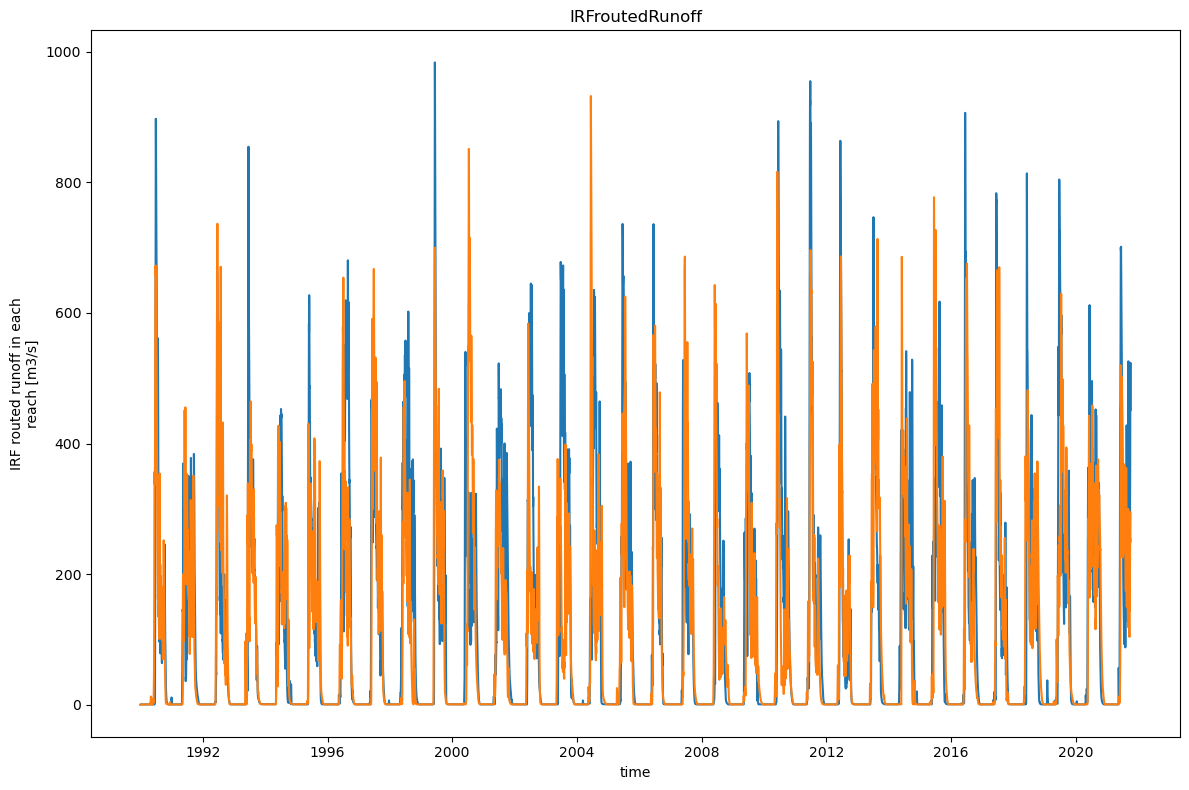

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8), sharex=True)

var = 'IRFroutedRunoff'
ds[var].sel(model='hC2LE7', seg=81000076).plot(ax=ax)
ds[var].sel(model='hC2LE9', seg=81000076).plot(ax=ax)
ax.set_title(var)

plt.tight_layout()
plt.show()